In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [85]:
def generate_transition_latent(arr1, arr2, frames=60):
    
    '''
    Generates all latents vectors between two arrays.
    
    Final array does not include the last vector
    '''
    
    assert arr1.shape == arr2.shape
    
    assert arr1.shape
    
    delta = np.divide(np.subtract(arr2, arr1), frames)
    out = np.empty((frames, arr1.shape[1], arr1.shape[2]), dtype=float)
    
    for frame in range(frames):
        out[frame] = arr1 + np.multiply((frame), delta)
        
    return out
    
#----------------------------------------------------------------------------

def transition_latent_from_key(arr): 
    
    '''
    inputs should be a list of tuples of (keyframe latent vector, frames)
    outputs (len(arr) - 1) segments
    '''
    
    latent_size = arr[0][0].shape
    
    for element in arr:
        assert type(element) is tuple
        assert len(element) == 2
        assert element[0].shape == latent_size
        latent_size == element[0].shape
    
    for i in range(len(arr)):
        
        try:
            transition_frame_set = generate_transition_latent(arr[i][0], arr[i+1][0], frames=arr[i][1])
            
            try:
                output = np.vstack((output, transition_frame_set))

            except NameError:
                output = transition_frame_set

        except IndexError:
            pass
            
    return output

In [86]:
arr1=np.random.randn(1, 1, 5)
arr2=np.random.randn(1, 1, 5)

latents = generate_transition_latent(arr1, arr2, frames=100)
print(arr1 == latents[0])
print(arr2 == latents[len(latents)-1])
print(arr2)
print(latents[len(latents)-1])

[[[ True  True  True  True  True]]]
[[[False False False False False]]]
[[[ 1.12930221  0.89759364 -0.05779862  0.8434199   0.27989523]]]
[[ 1.10696959  0.88708064 -0.06418604  0.83935346  0.26551376]]


In [91]:
arr = list((np.random.randn(1, 1, 5), 10) for i in range(10))
arr = list(tuple(i) for i in arr)
latents = transition_latent_from_key(arr)

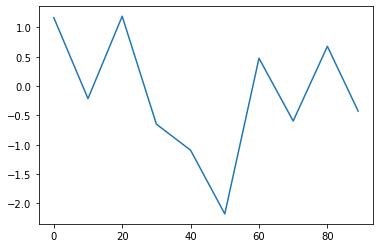

In [92]:
sample = list(i[0][3] for i in latents)

plt.figure()

plt.plot(np.arange(len(sample)), sample)

plt.show()

In [33]:
a = [[1, 2, 3], [10, 15, 18]]
b = [[3, 4, 5], [14, 13, 16]]
print(np.vstack((a, b)))
print(latents.shape)

[[ 1  2  3]
 [10 15 18]
 [ 3  4  5]
 [14 13 16]]
(41, 1, 5)
